In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [50]:
train=pd.read_csv('fashion-mnist_train.csv')
train.shape

(60000, 785)

In [51]:
test=pd.read_csv('fashion-mnist_test.csv')
test.shape

(10000, 785)

In [52]:
X_train=train.iloc[:,train.columns!='label']
y_train=train.iloc[:,train.columns=='label']

X_test=test.iloc[:,test.columns!='label']
y_test=test.iloc[:,test.columns=='label']


In [53]:

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 784), (60000, 1), (10000, 784), (10000, 1))

In [54]:
X_train = X_train.values.reshape(-1,28,28)
X_test = X_test.values.reshape(-1,28,28)

y_train = y_train.values.reshape(-1)
y_test = y_test.values.reshape(-1)

In [55]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [56]:
X_train=X_train/255
X_test=X_test/255

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [59]:
model=Sequential()

In [60]:
model.add(Conv2D(filters=32,padding='valid',input_shape=[28,28,1],kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.summary()


/Users/sarashaikh/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [62]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_validation,y_validation),batch_size=512,verbose=1)

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.7025 - loss: 0.9576 - val_accuracy: 0.8512 - val_loss: 0.4222
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.8598 - loss: 0.4022 - val_accuracy: 0.8779 - val_loss: 0.3517
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.8815 - loss: 0.3398 - val_accuracy: 0.8838 - val_loss: 0.3270
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.8908 - loss: 0.3146 - val_accuracy: 0.8846 - val_loss: 0.3185
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.9002 - loss: 0.2846 - val_accuracy: 0.8945 - val_loss: 0.2989
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.9037 - loss: 0.2684 - val_accuracy: 0.9001 - val_loss: 0.2827
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9136 - loss: 0.2405 - val_accuracy: 0.8988 - val_loss: 0.2812
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.9138 - loss: 0.2379 - val_accuracy: 0.9038 - v

In [63]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9064 - loss: 0.2565


[0.25312379002571106, 0.9096999764442444]

In [64]:
pred=model.predict(X_test).round(2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [65]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandle','Shirt','Sneaker','Bag','Ankle boot']

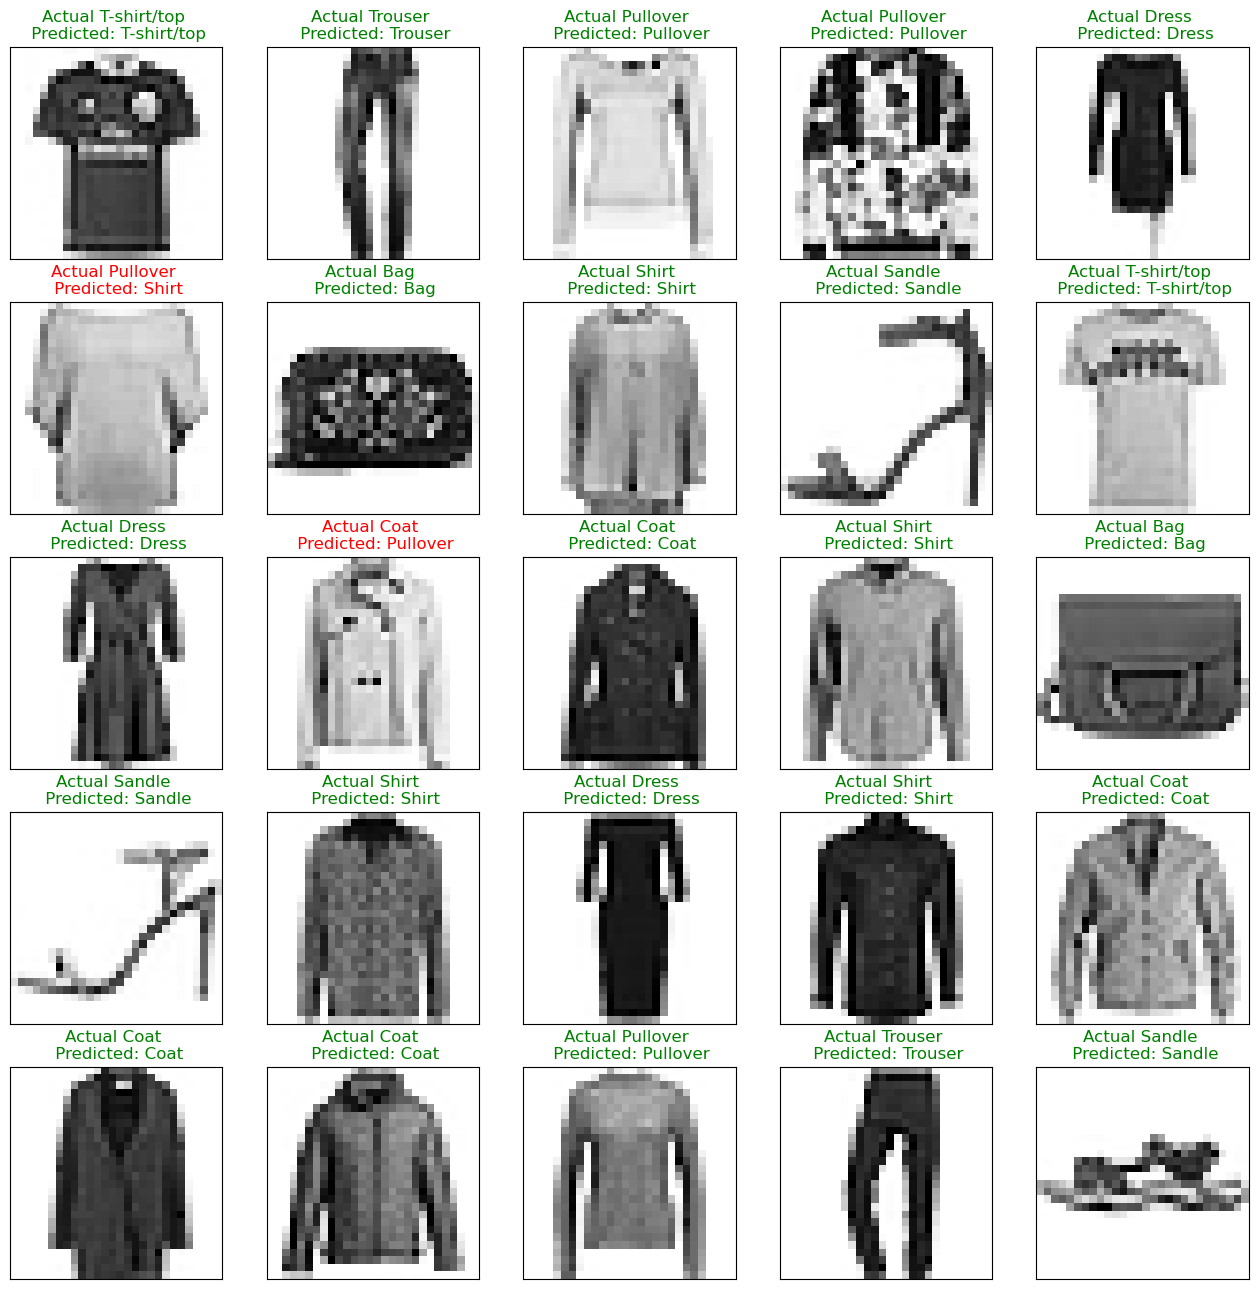

In [68]:
plt.figure(figsize=(16,16))
j=1
for i in range(25):
    plt.subplot(5,5,j);j+=1
    plt.imshow(X_test[i],cmap='Greys')
    clr=""
    if y_test[i]==np.argmax(pred[i]):
        clr='green'
    else:
        clr='red'
    plt.yticks([])
    plt.xticks([])
    plt.title(f"Actual {class_names[y_test[i]]} \n Predicted: {class_names[np.argmax(pred[i])]}",color=clr)

In [69]:
y_pred_cm=[np.argmax(row) for row in pred]
y_pred_cm

[0,
 1,
 2,
 2,
 3,
 6,
 8,
 6,
 5,
 0,
 3,
 2,
 4,
 6,
 8,
 5,
 6,
 3,
 6,
 4,
 4,
 4,
 2,
 1,
 5,
 7,
 8,
 4,
 4,
 1,
 5,
 7,
 7,
 8,
 1,
 0,
 9,
 8,
 0,
 8,
 6,
 0,
 6,
 2,
 2,
 0,
 3,
 3,
 2,
 3,
 2,
 4,
 9,
 3,
 0,
 9,
 9,
 4,
 0,
 3,
 4,
 5,
 4,
 6,
 1,
 1,
 0,
 9,
 5,
 2,
 7,
 3,
 4,
 6,
 5,
 7,
 1,
 6,
 1,
 3,
 9,
 8,
 1,
 2,
 4,
 8,
 9,
 4,
 1,
 6,
 3,
 6,
 2,
 2,
 2,
 0,
 4,
 5,
 7,
 3,
 9,
 6,
 9,
 6,
 8,
 2,
 3,
 8,
 2,
 7,
 5,
 5,
 3,
 2,
 7,
 5,
 6,
 2,
 7,
 3,
 0,
 5,
 6,
 4,
 7,
 0,
 5,
 5,
 0,
 3,
 1,
 7,
 9,
 4,
 9,
 6,
 4,
 6,
 6,
 4,
 3,
 3,
 3,
 2,
 2,
 6,
 0,
 0,
 1,
 3,
 4,
 3,
 3,
 1,
 9,
 3,
 3,
 3,
 9,
 5,
 6,
 7,
 7,
 3,
 2,
 4,
 0,
 6,
 7,
 2,
 2,
 8,
 9,
 0,
 2,
 4,
 4,
 5,
 7,
 9,
 7,
 1,
 3,
 9,
 1,
 5,
 5,
 6,
 0,
 7,
 4,
 9,
 1,
 6,
 0,
 0,
 6,
 4,
 6,
 9,
 0,
 4,
 2,
 5,
 5,
 8,
 6,
 2,
 1,
 9,
 4,
 2,
 7,
 1,
 9,
 5,
 9,
 6,
 2,
 8,
 5,
 7,
 7,
 3,
 2,
 4,
 5,
 7,
 8,
 1,
 9,
 5,
 0,
 2,
 9,
 7,
 4,
 0,
 9,
 2,
 1,
 5,
 7,
 7,
 0,
 2,
 4,
 5,
 3,
 3,


<Axes: >

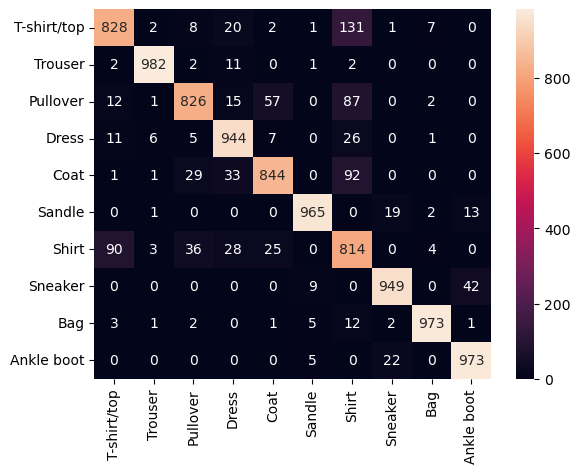

In [70]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_cm)
sns.heatmap(cm,annot=True,xticklabels=class_names,yticklabels=class_names,fmt='d')

In [71]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_cm,target_names=class_names)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.83      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.91      0.83      0.87      1000
       Dress       0.90      0.94      0.92      1000
        Coat       0.90      0.84      0.87      1000
      Sandle       0.98      0.96      0.97      1000
       Shirt       0.70      0.81      0.75      1000
     Sneaker       0.96      0.95      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

